In [1]:
import os
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

from build.autoneuronet import (
    operations,
    Var,
    Matrix,
    Linear,
    ReLU,
    Tanh,
    Sigmoid,
    NeuralNetwork,
    GradientDescentOptimizer,
    BCELoss,
)

/Users/rishabalagharu/.pyenv/versions/3.13.7/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Moons Classification with Activation Functions


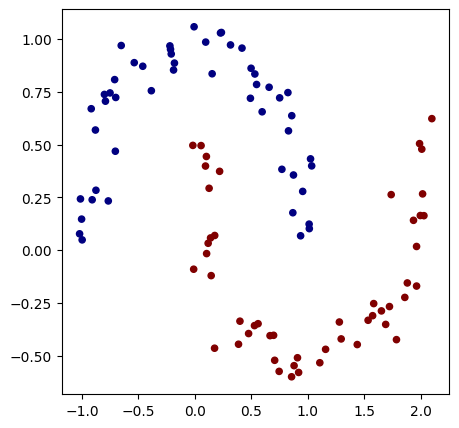

In [2]:
X, y = make_moons(n_samples=100, noise=0.1)
# X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3.0)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap="jet")

In [3]:
def numpy_to_matrix(numpy_array: np.ndarray) -> Matrix:
    numpy_array = np.asarray(numpy_array, dtype=float)

    if numpy_array.ndim == 1:
        numpy_array = numpy_array.reshape(-1, 1)
    elif numpy_array.ndim != 2:
        raise ValueError("Please pass in a 1D or 2D array")

    rows, cols = numpy_array.shape
    matrix = Matrix(rows, cols)

    for i in range(rows):
        for j in range(cols):
            matrix[i, j] = float(numpy_array[i, j])

    return matrix

In [4]:
X_matrix = numpy_to_matrix(X)
y_matrix = numpy_to_matrix(y)

In [5]:
lr = 1e-2
epochs = 5000

model = NeuralNetwork(
    [
        Linear(2, 16, init="he"),
        ReLU(),
        Linear(16, 16, init="he"),
        ReLU(),
        Linear(16, 1, init="he"),
        Sigmoid(),
    ]
)
optimizer = GradientDescentOptimizer(learning_rate=lr, model=model)

model

NeuralNetwork =
Linear(2, 16)
ReLU()
Linear(16, 16)
ReLU()
Linear(16, 1)
Sigmoid()

In [6]:
# Training Loop

for epoch in tqdm(
    range(epochs), desc="Training the moons classification Neural Network"
):
    optimizer.resetGrad()

    # Forward pass
    y_pred = model.forward(X_matrix)

    # Calculate the loss
    loss = BCELoss(y_matrix, y_pred)
    loss_val = loss.getVal()

    # Backpropagation
    loss.setGrad(1.0)
    loss.backward()
    optimizer.optimize()

    if epoch % 100 == 0:
        print(f"Epoch: {epoch + 1} | Train Loss: {loss_val}")

Training the moons classification Neural Network:   0%|          | 17/5000 [00:00<00:58, 85.58it/s]

Epoch: 1 | Train Loss: 0.9773850609504383


Training the moons classification Neural Network:   2%|▏         | 116/5000 [00:01<00:36, 132.64it/s]

Epoch: 101 | Train Loss: 0.4965638156148484


Training the moons classification Neural Network:   4%|▍         | 218/5000 [00:01<00:34, 138.01it/s]

Epoch: 201 | Train Loss: 0.41245207144789914


Training the moons classification Neural Network:   6%|▋         | 325/5000 [00:02<00:38, 120.70it/s]

Epoch: 301 | Train Loss: 0.36906131006029896


Training the moons classification Neural Network:   8%|▊         | 414/5000 [00:03<00:38, 120.32it/s]

Epoch: 401 | Train Loss: 0.34444510166715875


Training the moons classification Neural Network:  10%|█         | 515/5000 [00:04<00:39, 112.99it/s]

Epoch: 501 | Train Loss: 0.3281654828066852


Training the moons classification Neural Network:  12%|█▏        | 619/5000 [00:05<00:44, 98.12it/s] 

Epoch: 601 | Train Loss: 0.31634890697646734


Training the moons classification Neural Network:  14%|█▍        | 716/5000 [00:06<00:37, 113.92it/s]

Epoch: 701 | Train Loss: 0.30686161846445453


Training the moons classification Neural Network:  16%|█▋        | 813/5000 [00:06<00:36, 116.11it/s]

Epoch: 801 | Train Loss: 0.29892070921240266


Training the moons classification Neural Network:  18%|█▊        | 923/5000 [00:07<00:37, 109.97it/s]

Epoch: 901 | Train Loss: 0.29216661152501383


Training the moons classification Neural Network:  20%|██        | 1023/5000 [00:08<00:36, 110.44it/s]

Epoch: 1001 | Train Loss: 0.28626804535348


Training the moons classification Neural Network:  22%|██▏       | 1122/5000 [00:09<00:32, 119.33it/s]

Epoch: 1101 | Train Loss: 0.28098677334756844


Training the moons classification Neural Network:  24%|██▍       | 1224/5000 [00:10<00:30, 121.83it/s]

Epoch: 1201 | Train Loss: 0.2762678793866638


Training the moons classification Neural Network:  26%|██▋       | 1315/5000 [00:11<00:29, 123.87it/s]

Epoch: 1301 | Train Loss: 0.2719900783906965


Training the moons classification Neural Network:  28%|██▊       | 1419/5000 [00:12<00:28, 124.38it/s]

Epoch: 1401 | Train Loss: 0.2679537315899311


Training the moons classification Neural Network:  30%|███       | 1523/5000 [00:13<00:28, 120.96it/s]

Epoch: 1501 | Train Loss: 0.26410843852440913


Training the moons classification Neural Network:  32%|███▏      | 1614/5000 [00:13<00:27, 121.36it/s]

Epoch: 1601 | Train Loss: 0.2604889706520515


Training the moons classification Neural Network:  34%|███▍      | 1718/5000 [00:14<00:27, 120.52it/s]

Epoch: 1701 | Train Loss: 0.2569320732632016


Training the moons classification Neural Network:  36%|███▋      | 1822/5000 [00:15<00:25, 123.50it/s]

Epoch: 1801 | Train Loss: 0.25348817345487046


Training the moons classification Neural Network:  39%|███▊      | 1926/5000 [00:16<00:24, 125.33it/s]

Epoch: 1901 | Train Loss: 0.2502547608510386


Training the moons classification Neural Network:  40%|████      | 2017/5000 [00:17<00:24, 124.28it/s]

Epoch: 2001 | Train Loss: 0.2472410753588863


Training the moons classification Neural Network:  42%|████▏     | 2121/5000 [00:17<00:23, 123.45it/s]

Epoch: 2101 | Train Loss: 0.24430904522443098


Training the moons classification Neural Network:  44%|████▍     | 2224/5000 [00:19<00:26, 106.25it/s]

Epoch: 2201 | Train Loss: 0.24136678781422966


Training the moons classification Neural Network:  46%|████▋     | 2321/5000 [00:19<00:23, 116.39it/s]

Epoch: 2301 | Train Loss: 0.23827110731996992


Training the moons classification Neural Network:  48%|████▊     | 2419/5000 [00:20<00:23, 109.53it/s]

Epoch: 2401 | Train Loss: 0.23506568291301103


Training the moons classification Neural Network:  50%|█████     | 2514/5000 [00:21<00:21, 116.27it/s]

Epoch: 2501 | Train Loss: 0.23172162997151655


Training the moons classification Neural Network:  52%|█████▏    | 2614/5000 [00:22<00:19, 120.91it/s]

Epoch: 2601 | Train Loss: 0.22847745762643484


Training the moons classification Neural Network:  54%|█████▍    | 2714/5000 [00:23<00:20, 113.82it/s]

Epoch: 2701 | Train Loss: 0.22490034980170445


Training the moons classification Neural Network:  56%|█████▋    | 2814/5000 [00:24<00:18, 119.15it/s]

Epoch: 2801 | Train Loss: 0.22081516891750477


Training the moons classification Neural Network:  58%|█████▊    | 2914/5000 [00:25<00:17, 120.22it/s]

Epoch: 2901 | Train Loss: 0.21674026141286828


Training the moons classification Neural Network:  60%|██████    | 3018/5000 [00:25<00:16, 122.57it/s]

Epoch: 3001 | Train Loss: 0.2125703765651637


Training the moons classification Neural Network:  62%|██████▏   | 3122/5000 [00:26<00:15, 123.18it/s]

Epoch: 3101 | Train Loss: 0.2082415691381077


Training the moons classification Neural Network:  65%|██████▍   | 3226/5000 [00:27<00:14, 123.10it/s]

Epoch: 3201 | Train Loss: 0.20352178948782323


Training the moons classification Neural Network:  66%|██████▋   | 3317/5000 [00:28<00:13, 123.36it/s]

Epoch: 3301 | Train Loss: 0.1985733149156147


Training the moons classification Neural Network:  68%|██████▊   | 3425/5000 [00:29<00:16, 97.13it/s] 

Epoch: 3401 | Train Loss: 0.19360058079597


Training the moons classification Neural Network:  70%|███████   | 3512/5000 [00:30<00:12, 119.43it/s]

Epoch: 3501 | Train Loss: 0.18883285014624898


Training the moons classification Neural Network:  72%|███████▏  | 3614/5000 [00:31<00:11, 119.32it/s]

Epoch: 3601 | Train Loss: 0.18392116876174958


Training the moons classification Neural Network:  74%|███████▍  | 3718/5000 [00:32<00:10, 121.36it/s]

Epoch: 3701 | Train Loss: 0.17885077294319604


Training the moons classification Neural Network:  76%|███████▋  | 3822/5000 [00:33<00:09, 122.12it/s]

Epoch: 3801 | Train Loss: 0.1737819829668554


Training the moons classification Neural Network:  78%|███████▊  | 3924/5000 [00:33<00:09, 114.51it/s]

Epoch: 3901 | Train Loss: 0.1675492967602905


Training the moons classification Neural Network:  80%|████████  | 4025/5000 [00:34<00:07, 122.60it/s]

Epoch: 4001 | Train Loss: 0.161400214940677


Training the moons classification Neural Network:  82%|████████▏ | 4116/5000 [00:35<00:07, 123.59it/s]

Epoch: 4101 | Train Loss: 0.15602016832857804


Training the moons classification Neural Network:  84%|████████▍ | 4220/5000 [00:36<00:06, 120.40it/s]

Epoch: 4201 | Train Loss: 0.15074307872455114


Training the moons classification Neural Network:  86%|████████▋ | 4324/5000 [00:37<00:05, 123.69it/s]

Epoch: 4301 | Train Loss: 0.1453384899287798


Training the moons classification Neural Network:  88%|████████▊ | 4415/5000 [00:37<00:04, 123.02it/s]

Epoch: 4401 | Train Loss: 0.1398582256591338


Training the moons classification Neural Network:  90%|█████████ | 4518/5000 [00:38<00:04, 120.33it/s]

Epoch: 4501 | Train Loss: 0.1343344841441483


Training the moons classification Neural Network:  92%|█████████▏| 4622/5000 [00:39<00:03, 124.21it/s]

Epoch: 4601 | Train Loss: 0.12891255711416444


Training the moons classification Neural Network:  95%|█████████▍| 4726/5000 [00:40<00:02, 124.64it/s]

Epoch: 4701 | Train Loss: 0.12351547017861493


Training the moons classification Neural Network:  96%|█████████▋| 4825/5000 [00:41<00:01, 110.60it/s]

Epoch: 4801 | Train Loss: 0.11816925736599425


Training the moons classification Neural Network:  98%|█████████▊| 4915/5000 [00:42<00:00, 122.07it/s]

Epoch: 4901 | Train Loss: 0.11299269499714823


Training the moons classification Neural Network: 100%|██████████| 5000/5000 [00:42<00:00, 116.34it/s]


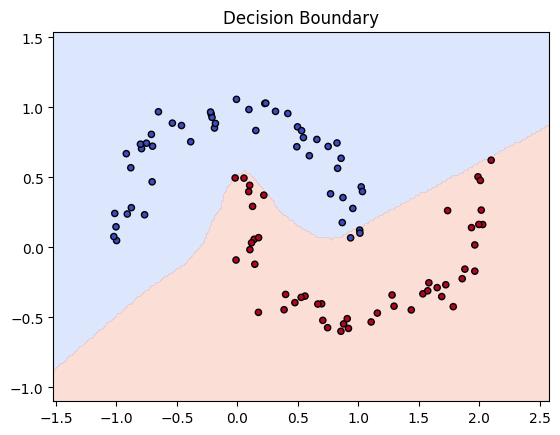

In [10]:
X = np.asarray(X)
y = np.asarray(y)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

grid_step = 0.02

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, grid_step),
    np.arange(y_min, y_max, grid_step),
)

grid = np.c_[xx.ravel(), yy.ravel()]
grid_mat = numpy_to_matrix(grid)
preds = model.forward(grid_mat)

Z = np.array([preds[i, 0].getVal() for i in range(preds.rows)])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z > 0.5, alpha=0.3, cmap="coolwarm")
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap="coolwarm", edgecolor="k")
plt.title("Decision Boundary")
plt.show()

In [8]:
os.makedirs("models", exist_ok=True)
model.saveWeights("models/moons_model.bin")

In [9]:
model.loadWeights("models/moons_model.bin")